# **ZOMATO RESTAURANT INDIA - (EDA + HYPOTHESIS TESTING)**

Zomato is a popular restaurant aggregator and food delivery platform.

The goal is to understand customer preferences, restaurant performance, and market dynamics through data cleaning, visualization, hypothesis testing, and feature engineering.

# **Objectives**


1. Understand the structure of the dataset and clean missing/inconsistent values.
2. Explore univariate, bivariate, and multivariate relationships (ratings, cuisines, costs, establishments).
3. Identify patterns and trends in restaurant popularity, pricing, and customer engagement.
4. Perform hypothesis testing to statistically validate insights.
5. Engineer new features (e.g., cost per person, popularity score, cuisine flags) for deeper analysis.
6. Summarize business insights and provide actionable recommendations.

# **About The Dataset**


This dataset is having the data of restaurants listed on Zomato in different cities in india, restaurant ratings, votes, etc.
Our dataset contains restaurant data of 99 cities in india.

Zomato Restaurant Dataset contains the following variables:
* res_id: Unique id of every restaurant across various cities in India
* name: Name of the restaurant
* establishment: type of restaurant format
* url: restaurant URl
* address: Address of the restaurant
* city: City in which restaurant is located
* city_id: id of city
* Locality: Location in the city
* latitude: Latitude coordinate of the restaurant's location
* longitude: Longitude coordinate of the restaurant's location
* zipcode: zipcode of location
* country_id: id of Country in which restaurant is located
* locality_verbose: Detailed description of the locality
* Cuisines: Cuisines offered by the restaurant
* timings: timings of the restaurant
* Average Cost for two: Cost for two people in different restaurants
* price_range: range of price of food
* currency: Currency of the country
* highlights: highlights of the restaurant.
* aggregate_rating: Average rating out of 5
* rating_text: text on the basis of rating of rating
* votes: Number of ratings casted by people
* photo_count: uploaded photos
* opentable_support
* delivery: -1 (No) / 1(yes)
* takeaway: -1 (No) / 1(yes)


# **EDA Workflow**


This analysis is structured into the following steps:

1. **Data Understanding**
   - Load the dataset
   - Explore features, info, and basic statistics  
   - Summarize dataset statistics

2. **Data Cleaning & Preparation**
   - Data type conversions
   - Duplicate removal
   - Handle missing values
   - Outliners detection
   - Clean Categorical Columns
   - Convert cuisines into lists

3. **Univariate Analysis**
   - Restaurant Chains and Outlets count
   - Top Restaurant Chains (by number of outlets)
   - Number of restaurants (by establishment type)
   - Number of restaurants (by city)
   - Number of restaurants (by cuisine)
   - Average cost for two distribution
   - Ratings distribution
   - Number of restaurants (by price ranges)
   - Number of restaurants (by highlights)
   - WordCloud of Top Highlights Words
   - Top restaurant chains (by average rating)

4. **Bivariate Analysis**
   - votes vs photo_count
   - Relation between average_price_for_two and aggregate_rating
   - Relation between votes and aggregate_rating

5. **Multivariate Analysis**
    - Which features are most strongly correlated?
    - Average aggregate_rating, votes and photos (by establishment)
    - Average aggregate_rating, votes and photos (by city)
    - Most Expensive Restauants

6. **Hypothesis Testing**
    - Independent t-test (Do Dining restaurants have higher average ratings than Quick Bites?)
    - Z-test (Compare average cost of two cities (Delhi vs Mumbai))
    - Chi-Square Test of Independence(Does higher price range imply higher rating??)

7. **Key Insights & Observations**
   - Summarize findings from all the analysis

8. **Conclusion & Outcomes**

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import matplotlib.cm as cm
import random
from wordcloud import WordCloud

In [2]:
# Suppressing all warnings
import warnings
warnings.filterwarnings('ignore')

# **Data Understanding & Loading**

### **Load the dataset**

In [ ]:
# Load the CSV file into a DataFrame
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Zomato EDA/zomato_restaurants_in_India.csv")

In [ ]:
# Set the option to show maximum columns
pd.set_option('display.max_columns', None)

### **Explore features, data types, and basic statistics**

In [ ]:
# Let's have a look on top 5 rows (default) of the data
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001.0,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010.0,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002.0,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,1,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [ ]:
# Let's have a look on last 5 rows of the data
data.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,390024.0,1,"Fatehgunj, Vadodara",North Indian,"11am – 3pm, 7pm – 11:30pm (Mon-Sun)",600,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,NaN,1,"Karelibaug, Vadodara",Fast Food,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,NaN,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese","11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,NaN,1,"Akota, Vadodara","Fast Food, Sandwich, Salad",8 AM to 1 AM,500,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,390007.0,1,"Vadiwadi, Vadodara","Cafe, Healthy Food, Coffee",7am – 11pm (Mon-Sun),600,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [ ]:
# Columns names
data.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [ ]:
# Shape of Data
print(f"Number of Rows: {data.shape[0]} \nNumber of Columns: {data.shape[1]}")

Number of Rows: 211944 
Number of Columns: 26


In [ ]:
# info of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [ ]:
print('Total cities count is: ',data['city'].nunique())

Total cities count is:  99


### **Summarize dataset statistics**

In [ ]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


# **Data Cleaning & Preparation**

### **Data type conversions**

In [ ]:
data.dtypes

,0
res_id,int64
name,object
establishment,object
url,object
address,object
city,object
city_id,int64
locality,object
latitude,float64
longitude,float64


In [ ]:
data['res_id'] = data['res_id'].astype('str')

There is no need to convert other datatype of any column

### **Removing Duplicates**


Its important to remove duplicate rows to avoid biasness in our analysis. Since res_id is unique identifier of our restaurants, we can use it to remove duplicates.

In [ ]:
# Detect Duplicates
data['res_id'].duplicated().sum()

np.int64(156376)

In [ ]:
# Drop Duplicates
data = data.drop_duplicates(['res_id'])

In [ ]:
data.shape

(55568, 26)

Oops! Looks like almost 75% of our data had duplicate rows. Its good that we got that out before getting started. Even though we are left with 1/4th of our original dataset, about 55000+ restaurants is still good enough to perform analysis.

### **Dealing with missing values**


Now let's check how many variables (columns) have missing values.
Then we will see which columns we need for further analysis, if a column will of no use to us then instead of dealing with missing values we will drop that column.

In [ ]:
data.isnull().sum()

,0
res_id,0
name,0
establishment,0
url,0
address,18
city,0
city_id,0
locality,0
latitude,0
longitude,0


We have 5 variables with some kind of missing values. Since zipcode has ~80% missing data, its better to not consider it at all. The other 4 features can be dealt with some kind of imputation, but before going through the trouble, its better to look and decide whether they would be beneficial for our analysis or we can simply omit them.

Here we will look at each feature and decide to consider them for our analysis or not:-




#### **res_id, name, establishment**

1. res_id - Unique ID for each restaurant
2. name - Name is useful since we will use it to find top restaurants
3. establishment - Let's see what type of values we have in establishment

In [ ]:
print(data['establishment'].value_counts())

establishment
['Quick Bites']        14032
['Casual Dining']      12270
['Café']                4123
['Bakery']              3741
['Dessert Parlour']     3675
['Sweet Shop']          2615
['Beverage Shop']       2440
[]                      1830
['Fine Dining']         1535
['Food Court']          1494
['Bar']                 1399
['Dhaba']               1282
['Kiosk']               1126
['Food Truck']           868
['Lounge']               820
['Bhojanalya']           632
['Mess']                 361
['Pub']                  357
['Paan Shop']            320
['Confectionery']        218
['Butcher Shop']         154
['Club']                 112
['Microbrewery']         110
['Shack']                 20
['Cocktail Bar']          16
['Irani Cafe']            14
['Pop up']                 4
Name: count, dtype: int64


Establishment looks like a nice feature to perform EDA, however each value has an unwanted square brackets and quotes which seems noisy. Let's remove them with replace function. Also, we have one value which is an empty string, let's rename it to "NA" to avoid confusion.

In [ ]:
# Using replace function we will replace both brackets and aporstrophe
data['establishment'] = data['establishment'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
print(data['establishment'].unique())

['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


In [ ]:
# Using replace we will rename empty strings name to NA
data["establishment"] = data["establishment"].replace("", "NA")
data['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', 'NA', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

#### **url, address, city**

4. url - URL is the link to restaurant's page which is not useful for us
5. address - Not useful since it has long strings and its difficult to classify
6. city - Let's check unique cities

In [ ]:
# Dropping url and address column from the data
data = data.drop(['url', 'address'], axis = 1)

In [ ]:
# Total number of unique Cities
data['city'].nunique()

99

In [ ]:
# Unique cities names
data['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [ ]:
len(data[data['city'] == 'New Delhi'])

1704

#### **city_id, locality**

7. city_id - We can uniquely use city name or id. So one feature is enough
8. locality - Let's see number of unique values

In [ ]:
print("Unique city names:", data["city"].nunique())
print("Unique city IDs:", data["city_id"].nunique())

Unique city names: 99
Unique city IDs: 83


In [ ]:
dup_ids = data.groupby("city_id")["city"].nunique()
dup_ids = dup_ids[dup_ids > 1]
print("City IDs with multiple city names:")
print(dup_ids)

City IDs with multiple city names:
city_id
1        6
2        2
3        3
6        2
11       2
12       5
16       2
11299    2
Name: city, dtype: int64


As we can this city_id data is not correct. every city have it's unique city_id but here in this data same city_id's are assigned to many different cities.

Also, we don't need city_id as we can use city name instead.
So, we will Drop city_id column.

In [ ]:
data.locality.nunique()

3731

Although it can be an interesting feature, but since this feature has so many unique classes, we will avoid it.

In [ ]:
# Dropping city_id and locality columns
data = data.drop(['city_id', 'locality'], axis = 1)

#### **latitude, longitude, zipcode, country_id**

9. latitude - Can be helpful while using geographic maps, but we won't be doing that here
10. longitude - Same as above
11. zipcode - Approx 80% missing values
12. country_id - Since this dataset is for Indian restaurants, there should be just one unique id here. Let's check.
13. locality_verbose - Same as locality

In [ ]:
data['country_id'].unique()

array([1])

In [ ]:
# Dropping latitude, longitude, zipcode, country_id, locality_verbose
data = data.drop(['latitude', 'longitude', 'zipcode', 'country_id', 'locality_verbose'], axis = 1)

#### **cuisines**

14. cuisines - This feature has some missing values. Even though this has 9382 unique classes, we can see that each restaurant has a list of cusinies and the composition of the list is the reason why we have so many different cuisine classes. Let's check actual number of unique cuisine classes. But first we need to replace null values with a label.

In [ ]:
data['cuisines'].nunique()

9382

In [ ]:
data['cuisines'].unique()

array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

In [ ]:
# Filling missing values with 'No Cuisine"
data["cuisines"] = data["cuisines"].fillna("No cuisine")

In [ ]:
data.cuisines.isnull().sum()

np.int64(0)

In [ ]:
# actual number of unique cuisine classes
unique_cuisines = []

for i in data["cuisines"]:
    unique_cuisines.extend(i.split(", "))

unique_cuisines = pd.Series(unique_cuisines)
print("Total number of unique cuisines = ", unique_cuisines.nunique())

Total number of unique cuisines =  134


In [ ]:
unique_cuisines

,0
0,North Indian
1,South Indian
2,Mithai
3,Street Food
4,Desserts
...,...
124229,Street Food
124230,Fast Food
124231,Fast Food
124232,Sandwich


In [ ]:
unique_cuisines.unique()

array(['North Indian', 'South Indian', 'Mithai', 'Street Food',
       'Desserts', 'Mughlai', 'Rolls', 'Chinese', 'Fast Food', 'Bakery',
       'Continental', 'Italian', 'Pizza', 'Cafe', 'Burger', 'Wraps',
       'Beverages', 'Rajasthani', 'Mexican', 'Healthy Food', 'Sandwich',
       'Salad', 'Momos', 'Lebanese', 'Mediterranean', 'Thai', 'Gujarati',
       'Indian', 'Finger Food', 'European', 'Tea', 'Asian', 'Bar Food',
       'Kebab', 'Paan', 'Biryani', 'Juices', 'Ice Cream', 'Japanese',
       'Korean', 'Afghan', 'Awadhi', 'No cuisine', 'Hyderabadi',
       'Lucknowi', 'Roast Chicken', 'Drinks Only', 'Coffee', 'American',
       'BBQ', 'Maharashtrian', 'Modern Indian', 'Andhra', 'Konkan',
       'Kerala', 'Sushi', 'Parsi', 'Greek', 'Bengali', 'Seafood',
       'Frozen Yogurt', 'Arabian', 'Indonesian', 'Sindhi', 'Hot dogs',
       'Goan', 'Charcoal Chicken', 'Raw Meats', 'Grill', 'Malwani',
       'Cantonese', 'Pakistani', 'Steak', 'Vietnamese', 'Singaporean',
       'Middle Eastern'

#### **timings**

15. timings - This also has missing data, however it has 7740 unique classes. Also, it is not structured even if we try to reduce the number classes like we did in cuisines. Its better to omit it altogether.

In [ ]:
print(data['timings'].nunique())

7740


In [ ]:
print(data['timings'].unique())

['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']


In [ ]:
data = data.drop(['timings'], axis= 1)

#### **average_cost_for_two**


16. average_cost_for_two - This is an interesting feature for our analysis, although the value "0" is strange and should be an outlier

In [ ]:
data['average_cost_for_two'].value_counts().sort_index()

,count
average_cost_for_two,
0,820
2,1
15,1
20,3
30,3
...,...
10000,1
12000,3
14000,1


In [ ]:
data['average_cost_for_two'].nunique()

145

In [ ]:
data['average_cost_for_two'].describe()

,average_cost_for_two
count,55568.000000
mean,528.205874
std,595.028447
min,0.000000
25%,200.000000
50%,350.000000
75%,600.000000
max,30000.000000


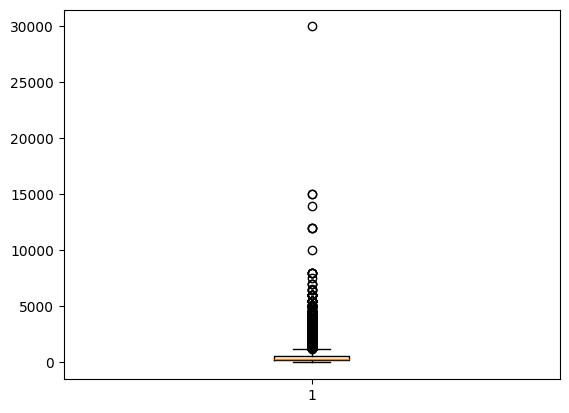

In [ ]:
plt.boxplot(data['average_cost_for_two'])
plt.show()

#### **price_range**

17. price_range - Average prices automatically characterized into bins

In [ ]:
data['price_range'].value_counts()

,count
price_range,
1,28818
2,16582
3,7370
4,2798


#### **currency**

18. currency - Only one class. Not useful

In [ ]:
data.currency.value_counts()

,count
currency,
Rs.,55568


In [ ]:
data = data.drop(['currency'], axis = 1)

#### **highlights**

19. highlights - They represent certain features that the restaurant specializes in and wants to highlight to their customers. Each restaurant has a list of highlights which makes the composition different for each one. We can, filter this and find total unique highlights from all restaurants.

In [ ]:
print(data["highlights"].nunique())
print(data["highlights"].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [ ]:
# Unique Highlights
unique_highlights = []
for i in data['highlights']:
  unique_highlights.extend(i[2:-2].split("', '"))
unique_highlights = pd.Series(unique_highlights)
print("Total number of unique highlights = ", unique_highlights.nunique())

Total number of unique highlights =  104


In [ ]:
unique_highlights.unique()

array(['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash',
       'Air Conditioned', 'Indoor Seating', 'Pure Veg', 'Delivery',
       'No Alcohol Available', 'Breakfast', 'Outdoor Seating',
       'Self Service', 'Digital Payments Accepted', 'Desserts and Bakes',
       'Smoking Area', 'Dance Floor', 'Serves Alcohol', 'Debit Card',
       'Wine', 'Live Music', 'Rooftop', 'Live Sports Screening',
       'Fullbar', 'Beer', 'Serves Cocktails', 'Table booking recommended',
       'Available for Functions', 'Resto Bar', 'Hookah', 'Wifi', 'DJ',
       'Live Entertainment', 'City View', 'Free Parking', 'Free Wifi',
       'Table booking not available', 'Table Reservation Not Required',
       'Axis Bank - Dining Delights', 'No Seating Available', 'Buffet',
       'Serves Jain Food', 'Poolside', 'Table reservation required',
       'Restricted Entry', 'Valet Parking Available', 'Sodexo',
       '4/5 Star', 'Karaoke', 'Kid Friendly',
       'Private Dining Area Available', 'Nightlif

#### **aggregate_rating, rating_text, votes, photo_count**

20. aggregate_rating - Rating given to the restaurant
21. rating_text - Zomato’s rating_text often appears in multiple languages, but they all map to a small set of English categories.
22. votes - Number of votes contributing to the rating
23. photo_count - Photo uploads in reviews

Let's check the mean and range of above features

In [ ]:
rating_text = data['rating_text'].value_counts()
print(rating_text)

rating_text
Average          16313
Good             16019
Very Good        10905
Not rated        10058
Excellent         1609
Poor               575
Sangat Baik          9
Çok iyi              8
Bom                  7
Baik                 5
İyi                  5
Velmi dobré          5
Muito Bom            5
Dobré                4
Promedio             4
Skvělá volba         4
Průměr               4
Buono                4
Excelente            3
Skvělé               3
Muy Bueno            3
Terbaik              2
Bardzo dobrze        2
Vynikajúce           2
Veľmi dobré          2
Ortalama             1
Bueno                1
Muito bom            1
Scarso               1
Harika               1
Eccellente           1
Média                1
Dobrze               1
Name: count, dtype: int64


In [ ]:
# Mapping of multiple languages → English categories
rating_map = {
    # Excellent
    'Eccellente': 'Excellent', 'Excelente': 'Excellent', 'Excellent': 'Excellent',
    'Harika': 'Excellent', 'Terbaik': 'Excellent', 'Vynikajúce': 'Excellent',
    'Çok iyi': 'Excellent',

    # Very Good
    'Muy Bueno': 'Very Good', 'Muito Bom': 'Very Good', 'Muito bom': 'Very Good',
    'Velmi dobré': 'Very Good', 'Veľmi dobré': 'Very Good', 'Skvělá volba': 'Very Good',
    'Skvělé': 'Very Good', 'Sangat Baik': 'Very Good', 'Çok iyi': 'Very Good',
    'Very Good': 'Very Good',

    # Good
    'Buono': 'Good', 'Bueno': 'Good', 'Dobrze': 'Good', 'Dobré': 'Good',
    'İyi': 'Good', 'Good': 'Good',

    # Average
    'Average': 'Average', 'Média': 'Average', 'Ortalama': 'Average',
    'Průměr': 'Average', 'Baik': 'Average', 'Bardzo dobrze': 'Average',

    # Poor
    'Poor': 'Poor', 'Scarso': 'Poor', 'Bom': 'Poor',

    # Not Rated
    'Not rated': 'Not rated', 'Promedio': 'Not rated'
}

# Apply mapping to rating_text column
data['rating_text'] = data['rating_text'].replace(rating_map)

# Check unique values after cleaning
print(data['rating_text'].unique())

['Very Good' 'Excellent' 'Good' 'Average' 'Not rated' 'Poor']


In [ ]:
data['rating_text'].value_counts()

,count
rating_text,
Average,16326
Good,16034
Very Good,10945
Not rated,10062
Excellent,1618
Poor,583


In [ ]:
data[['aggregate_rating', 'votes', 'photo_count']].describe()

,aggregate_rating,votes,photo_count
count,55568.000000,55568.000000,55568.000000
mean,2.958593,223.330352,160.974770
std,1.464576,618.224019,586.975382
min,0.000000,-18.000000,0.000000
25%,2.900000,6.000000,1.000000
50%,3.500000,35.000000,10.000000
75%,3.900000,175.000000,69.000000
max,4.900000,42539.000000,17702.000000


Rating ranges between 0 and 5 while 42539 are the maximum votes given to a restaurant. The negative value in votes might be an outlier.

#### **opentable_support, delivery, takeaway**

24. opentable_support - Not useful since no restaurant has True value for this
25. delivery - This feature has 3 classes but there is no explanation for those classes. We can consider -1 and 0 to be one class or ignore this feature for now
26. takeaway - Again not useful since it only has one class

In [ ]:
data["opentable_support"].unique()

array([ 0., nan])

In [ ]:
data["delivery"].unique()

array([-1,  1,  0])

In [ ]:
data["takeaway"].unique()

array([-1])

In [ ]:
data = data.drop(['opentable_support', 'delivery', 'takeaway'], axis = 1)

In [ ]:
data.head()

,res_id,name,establishment,city,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count
0,3400299,Bikanervala,Quick Bites,Agra,"North Indian, South Indian, Mithai, Street Foo...",700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154
1,3400005,Mama Chicken Mama Franky House,Quick Bites,Agra,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161
2,3401013,Bhagat Halwai,Quick Bites,Agra,"Fast Food, Mithai",300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107
3,3400290,Bhagat Halwai,Quick Bites,Agra,"Desserts, Bakery, Fast Food, South Indian",300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,Agra,"North Indian, Continental, Italian",1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291


### **Outliners Detection**

In [ ]:
data['price_range'].value_counts()

,count
price_range,
1,28818
2,16582
3,7370
4,2798


In [ ]:
data[data['aggregate_rating'] > 5]

,res_id,name,establishment,city,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count


There are no outliners in Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55568 entries, 0 to 211942
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                55568 non-null  object 
 1   name                  55568 non-null  object 
 2   establishment         55568 non-null  object 
 3   city                  55568 non-null  object 
 4   cuisines              55568 non-null  object 
 5   average_cost_for_two  55568 non-null  int64  
 6   price_range           55568 non-null  int64  
 7   highlights            55568 non-null  object 
 8   aggregate_rating      55568 non-null  float64
 9   rating_text           55568 non-null  object 
 10  votes                 55568 non-null  int64  
 11  photo_count           55568 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 5.5+ MB


### **Clean Categorical Columns**


In [ ]:
# Standardize text: lowercase, strip spaces
cat_cols = ['name', 'establishment', 'city', 'cuisines', 'rating_text']
for col in cat_cols:
    data[col] = data[col].astype(str).str.strip().str.lower()

### **Convert cuisines into lists**

In [ ]:
# Split Multi-Value Columns
# Cuisines → list

cleaned_cuisines = []

for x in data['cuisines']:
    cleaned_cuisines.append(x.split(','))

data['cuisines'] = cleaned_cuisines

# **Univariate Analysis**

### **Restaurant Chains and Outlets count**

In [ ]:
outlets = data['name'].value_counts()
print(outlets)

name
domino's pizza                           399
cafe coffee day                          317
kfc                                      204
baskin robbins                           202
keventers                                189
                                        ... 
7-eleven restaurant                        1
silver saloon - taj usha kiran palace      1
amrit bhoj                                 1
grace foods                                1
pandit zayka                               1
Name: count, Length: 40749, dtype: int64


In [ ]:
# restaurant_chains contains name of restautants which have more than 1 outlets.
restaurant_chains = outlets[outlets > 1]
print(restaurant_chains)

name
domino's pizza                    399
cafe coffee day                   317
kfc                               204
baskin robbins                    202
keventers                         189
                                 ... 
hong kong restaurant                2
ali baba & 41 dishes                2
tasty jigarthanda                   2
best tea cafe                       2
sri jagannath icecream parlour      2
Name: count, Length: 5007, dtype: int64


In [ ]:
# single_restaurant contains name of restautants which do not have chains (only 1 outlet).
single_restaurants = outlets[outlets == 1]
print(single_restaurants)

name
madhuban bakers                          1
ming yang                                1
pahun restaurant                         1
prashant's homestay nainital             1
raafae's dastarkhwan                     1
                                        ..
7-eleven restaurant                      1
silver saloon - taj usha kiran palace    1
amrit bhoj                               1
grace foods                              1
pandit zayka                             1
Name: count, Length: 35742, dtype: int64


In [ ]:
data.shape

(55568, 12)

In [ ]:
restaurant_chains_percentage = 100 - round((len(single_restaurants) / data.shape[0]  * 100), 2)
print(restaurant_chains_percentage)

35.68000000000001


In [ ]:
Total_Restaurants_with_chains = data.shape[0] - len(single_restaurants)
Total_Restaurants_without_chains = len(single_restaurants)

In [ ]:
print('Total Restaurants: ', data.shape[0])
print('Total Restaurants with chains: ', data.shape[0] - len(single_restaurants))
print('Total Restaurants without chains: ', len(single_restaurants))
print('Percentage of Restaurants that are part of a chain: ', restaurant_chains_percentage,'%')

Total Restaurants:  55568
Total Restaurants with chains:  19826
Total Restaurants without chains:  35742
Percentage of Restaurants that are part of a chain:  35.68000000000001 %


35% of total restaurants are part of some kind of restaurant chain. Here, we should account for cases where two different retaurants might have exact same name but are not related to each other.

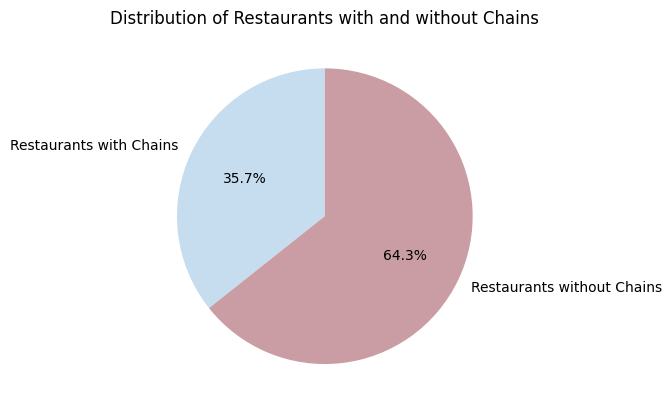

In [ ]:
labels = ['Restaurants with Chains', 'Restaurants without Chains']
sizes = [Total_Restaurants_with_chains, Total_Restaurants_without_chains]
colors = ["#C6DDF0","#C99DA3"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Restaurants with and without Chains')
plt.show()

### **Top Restaurant Chains (by number of outlets)**

Let's plot a horizontal bar graph to look at Top 10 restaurant chains. For the color scheme, we are using a list of pre-defined and selected colours to make the chart more appealing. If you want your analysis to look good visually, you should customize each and every element of your graph.

In [ ]:
# Top 10 restaurant chains
top10_restaurant_chains = restaurant_chains.head(10).sort_values(ascending=True)
top10_restaurant_chains

,count
name,
burger king,110
barbeque nation,112
pizza hut,126
mcdonald's,132
subway,178
keventers,189
baskin robbins,202
kfc,204
cafe coffee day,317


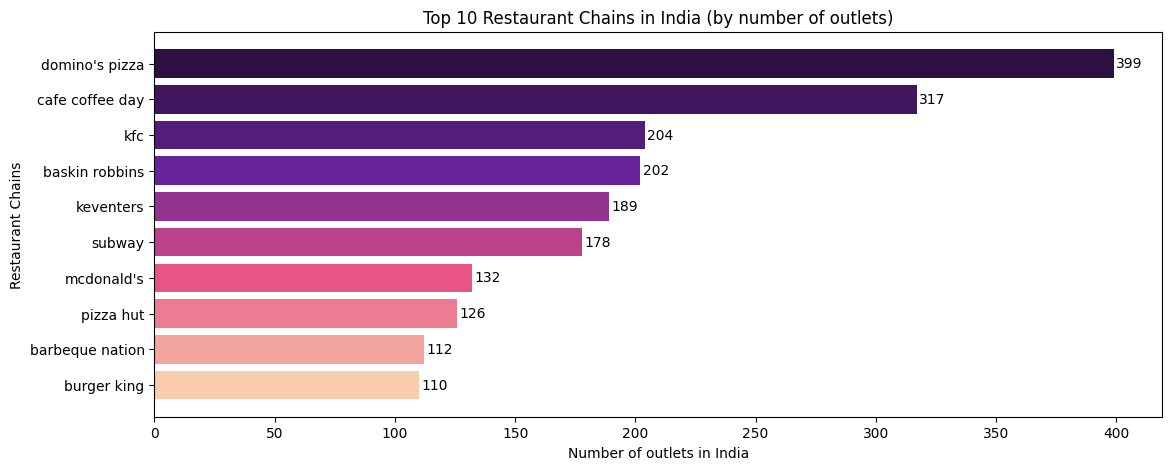

In [ ]:
# Plot
plt.figure(figsize=(13,5))
bars = top10_restaurant_chains.index
height = top10_restaurant_chains.values

colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(bars, height, color=colors)

# Add labels
for i, v in enumerate(height):
    plt.text(v+1, i, str(v), va='center', color='black')

plt.xlabel("Number of outlets in India")
plt.ylabel("Restaurant Chains")
plt.title("Top 10 Restaurant Chains in India (by number of outlets)")
plt.show()

This chart is majorly dominaed by big fast food chains

### **Number of restaurants (by establishment type)**

In [ ]:
restaurants_by_establishment = data['establishment'].value_counts().head()
restaurants_by_establishment

,count
establishment,
quick bites,14032
casual dining,12270
café,4123
bakery,3741
dessert parlour,3675


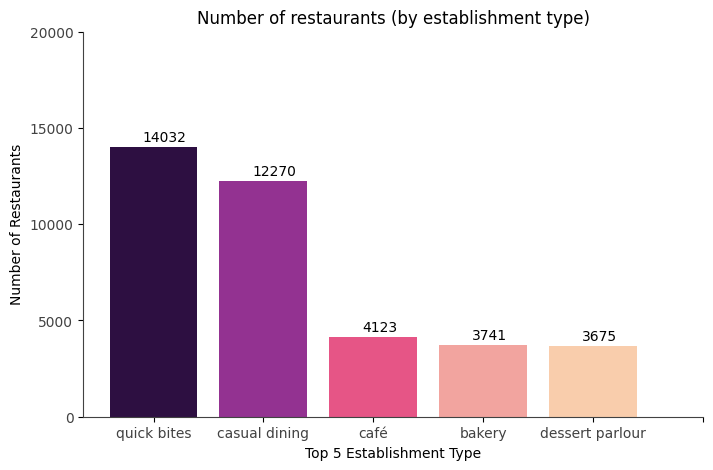

In [ ]:
# Plot
fig = plt.figure(figsize=(8,5), frameon = False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

bars = restaurants_by_establishment.index
est_count = restaurants_by_establishment.values

colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(bars, est_count, color=colors)

# Add labels
for i, v in enumerate(est_count):
    plt.text(i-0.1, v+500, str(v), va='center', color='black')

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 Establishment Type")
plt.ylabel("Number of Restaurants")
plt.title("Number of restaurants (by establishment type)")
plt.show()

Top 3 represents more casual and quick service restaurants, then from 4-6 we have dessert based shops.

### **Number of restaurants (by city)**

In [ ]:
restro_count_by_city = data['city'].value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True)
restro_count_by_city

,count
city,
lucknow,1135
goa,1150
ahmedabad,1247
kolkata,1361
jaipur,1395
new delhi,1704
chennai,1827
pune,1843
mumbai,2022


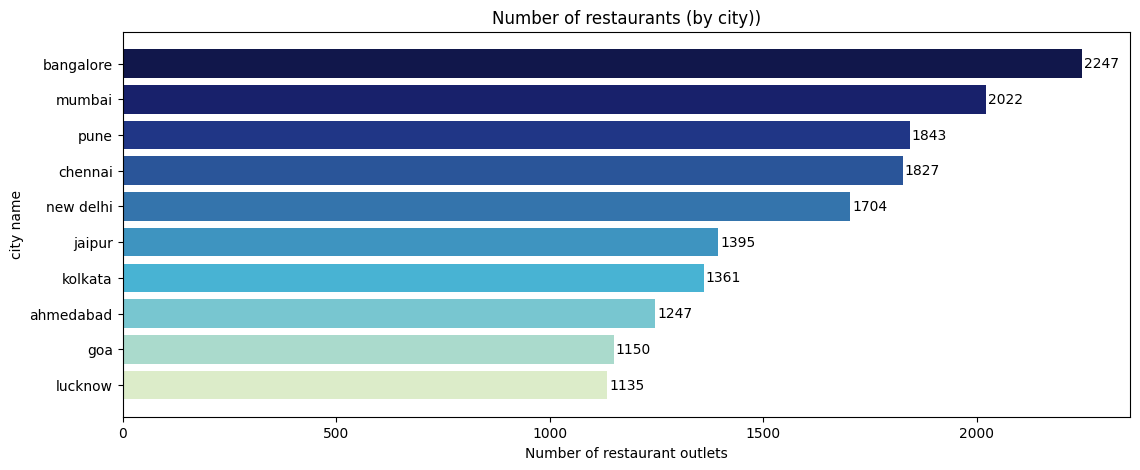

In [ ]:
# Plot
plt.figure(figsize=(13,5))
bars = restro_count_by_city.index
height = restro_count_by_city.values

colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(bars, height, color=colors)

# Add labels
for i, v in enumerate(height):
    plt.text(v+5, i, str(v), va='center', color='black')

plt.xlabel("Number of restaurant outlets")
plt.ylabel("city name")
plt.title("Number of restaurants (by city))")
plt.show()

As expected, metro cities have more number of restaurants than others with South India dominating the Top 4

### **Number of restaurants (by cuisine)**

In [ ]:
unique_cuisines.unique()

array(['North Indian', 'South Indian', 'Mithai', 'Street Food',
       'Desserts', 'Mughlai', 'Rolls', 'Chinese', 'Fast Food', 'Bakery',
       'Continental', 'Italian', 'Pizza', 'Cafe', 'Burger', 'Wraps',
       'Beverages', 'Rajasthani', 'Mexican', 'Healthy Food', 'Sandwich',
       'Salad', 'Momos', 'Lebanese', 'Mediterranean', 'Thai', 'Gujarati',
       'Indian', 'Finger Food', 'European', 'Tea', 'Asian', 'Bar Food',
       'Kebab', 'Paan', 'Biryani', 'Juices', 'Ice Cream', 'Japanese',
       'Korean', 'Afghan', 'Awadhi', 'No cuisine', 'Hyderabadi',
       'Lucknowi', 'Roast Chicken', 'Drinks Only', 'Coffee', 'American',
       'BBQ', 'Maharashtrian', 'Modern Indian', 'Andhra', 'Konkan',
       'Kerala', 'Sushi', 'Parsi', 'Greek', 'Bengali', 'Seafood',
       'Frozen Yogurt', 'Arabian', 'Indonesian', 'Sindhi', 'Hot dogs',
       'Goan', 'Charcoal Chicken', 'Raw Meats', 'Grill', 'Malwani',
       'Cantonese', 'Pakistani', 'Steak', 'Vietnamese', 'Singaporean',
       'Middle Eastern'

In [ ]:
restro_by_cuisines = unique_cuisines.value_counts().sort_values(ascending=False).head(5)
restro_by_cuisines

,count
North Indian,19226
Chinese,12724
Fast Food,11988
Desserts,7064
Beverages,6754


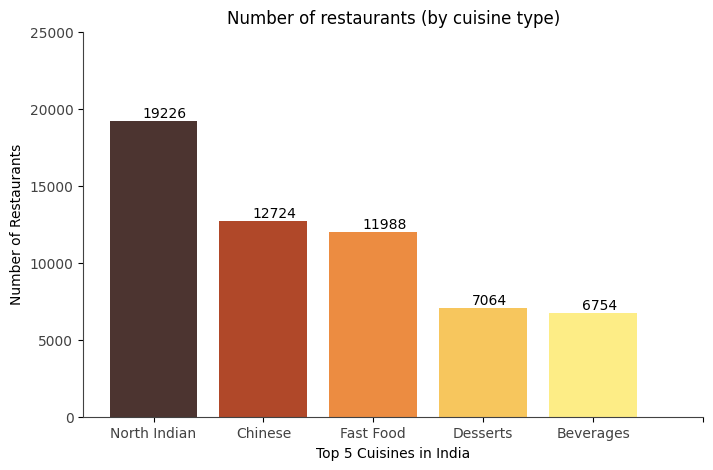

In [ ]:
# Plot
fig = plt.figure(figsize=(8,5), frameon = False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

bars = restro_by_cuisines.index
est_count = restro_by_cuisines.values

colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(bars, est_count, color=colors)

# Add labels
for i, v in enumerate(est_count):
    plt.text(i-0.1, v+500, str(v), va='center', color='black')

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 30000, 5000), color="#424242")
plt.xlabel("Top 5 Cuisines in India")
plt.ylabel("Number of Restaurants")
plt.title("Number of restaurants (by cuisine type)")
plt.show()

Surprisingly, Chinese food comes second in the list of cuisines that Indians prefer, even more than fast food, desserts and South Indian food.

### **Average cost for two distribution**

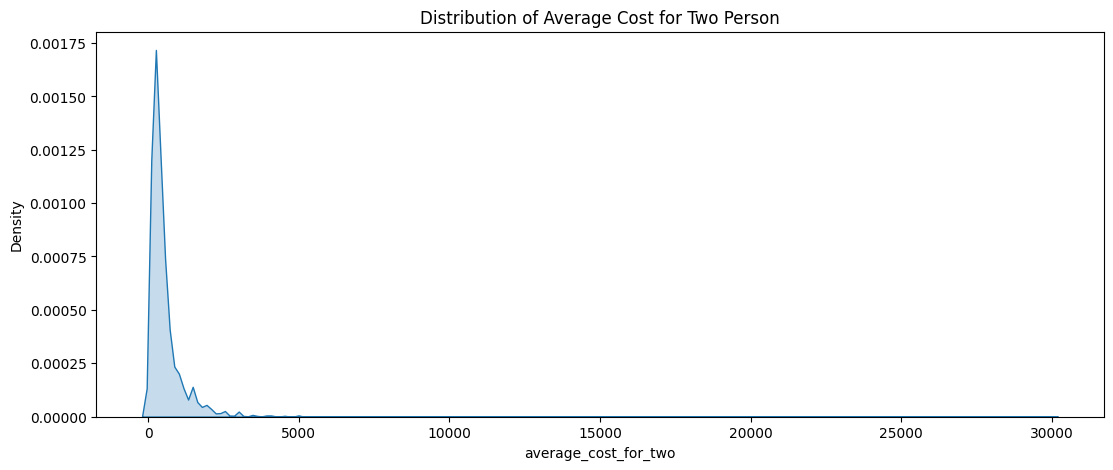

In [ ]:
plt.figure(figsize = (13, 5))
sns.kdeplot(data['average_cost_for_two'], shade = True)
plt.title('Distribution of Average Cost for Two Person')
plt.xlabel('average_cost_for_two')
plt.ylabel('Density')
plt.show()

With few restaurants charging average of Rs. 5000+ for two, this graph is extremely skewed. Let's take a closer look at a lower range of 0 to 6000.

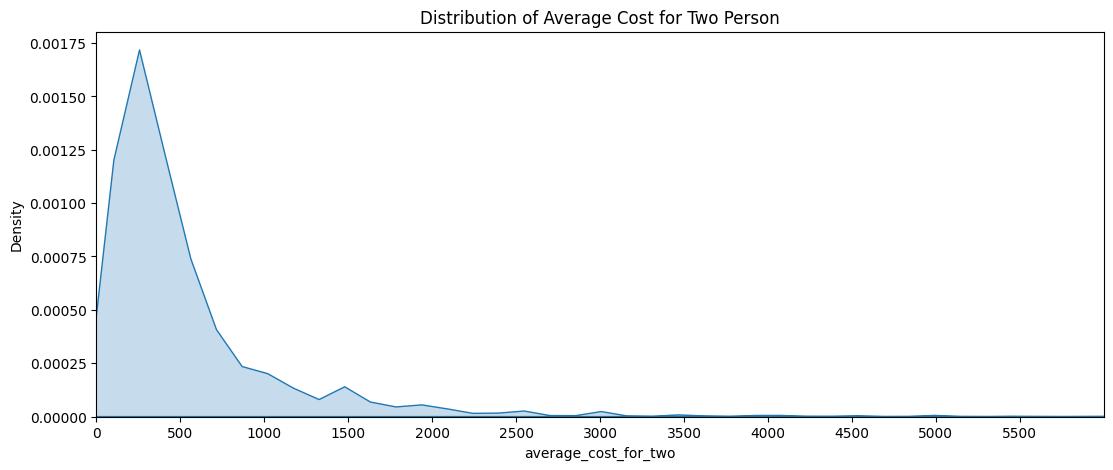

In [ ]:
plt.figure(figsize = (13, 5))
sns.kdeplot(data['average_cost_for_two'], shade = True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title('Distribution of Average Cost for Two Person')
plt.xlabel('average_cost_for_two')
plt.ylabel('Density')
plt.show()

Majority of restaurants are budget friendly with an average cost between Rs.250 to Rs.800 for two.

### **Ratings distribution**

Let's see how the ratings are distributes

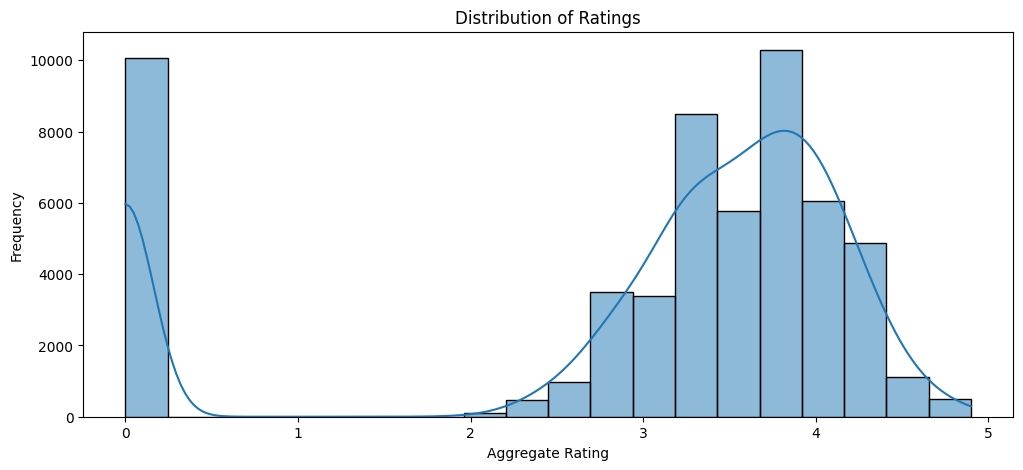

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data['aggregate_rating'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

There is a huge spike at 0 which might account for newly opened or unrated restaurants. On average, majority of restaurants have rating between 3 to 4 with fewer restaurants managing to go beyond

### **Number of restaurants (by price ranges)**

In [ ]:
restro_by_price_range = data.price_range.value_counts()
restro_by_price_range

,count
price_range,
1,28818
2,16582
3,7370
4,2798


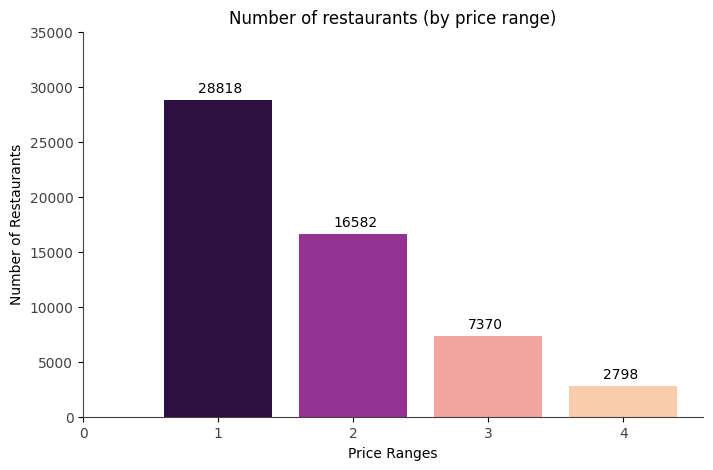

In [ ]:
# Plot
fig = plt.figure(figsize=(8,5), frameon = False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

bars = restro_by_price_range.index
est_count = restro_by_price_range.values

colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(bars, est_count, color=colors)

# Add labels
for i, v in enumerate(est_count):
    plt.text(i+0.85, v+700, str(v), color='black')

plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")
plt.ylabel("Number of Restaurants")
plt.title("Number of restaurants (by price range)")
plt.show()

Price range chart supports our previous observation from the Average cost chart. Number of restaurant decreases with increase in price range.

### **Number of restaurants (by highlights)**

In [ ]:
# In the above cells we computed unique_highlights from the highlights column
unique_highlights.unique()

array(['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash',
       'Air Conditioned', 'Indoor Seating', 'Pure Veg', 'Delivery',
       'No Alcohol Available', 'Breakfast', 'Outdoor Seating',
       'Self Service', 'Digital Payments Accepted', 'Desserts and Bakes',
       'Smoking Area', 'Dance Floor', 'Serves Alcohol', 'Debit Card',
       'Wine', 'Live Music', 'Rooftop', 'Live Sports Screening',
       'Fullbar', 'Beer', 'Serves Cocktails', 'Table booking recommended',
       'Available for Functions', 'Resto Bar', 'Hookah', 'Wifi', 'DJ',
       'Live Entertainment', 'City View', 'Free Parking', 'Free Wifi',
       'Table booking not available', 'Table Reservation Not Required',
       'Axis Bank - Dining Delights', 'No Seating Available', 'Buffet',
       'Serves Jain Food', 'Poolside', 'Table reservation required',
       'Restricted Entry', 'Valet Parking Available', 'Sodexo',
       '4/5 Star', 'Karaoke', 'Kid Friendly',
       'Private Dining Area Available', 'Nightlif

In [ ]:
restro_by_highlights = unique_highlights.value_counts().sort_values(ascending=False).head(5)
restro_by_highlights

,count
Cash,52825
Takeaway Available,46773
Indoor Seating,40609
Dinner,37643
Lunch,36043


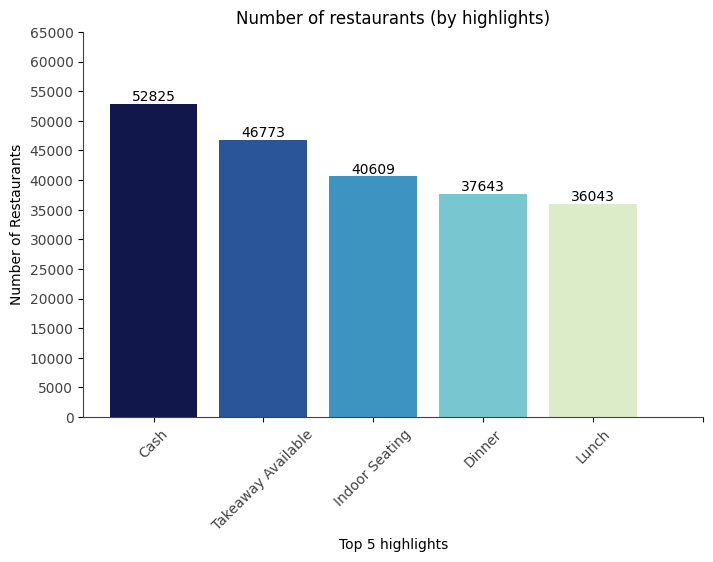

In [ ]:
# Plot
fig = plt.figure(figsize=(8,5), frameon = False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

bars = restro_by_highlights.index
est_count = restro_by_highlights.values

colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(bars, est_count, color=colors)

# Add labels
for i, v in enumerate(est_count):
    plt.text(i-0.2, v+500, str(v), color='black')

plt.xticks(range(0, 6), color="#424242", rotation = 45)
plt.yticks(range(0, 70000, 5000), color="#424242")
plt.xlabel("Top 5 highlights")
plt.ylabel("Number of Restaurants")
plt.title("Number of restaurants (by highlights)")
plt.show()

Top 5 highlights doesn't convey much information since they are very trivial to almost every restaurant.

### **WordCloud of Top Highlights Words**


Here we will create a wordcloud of top 30 highlights

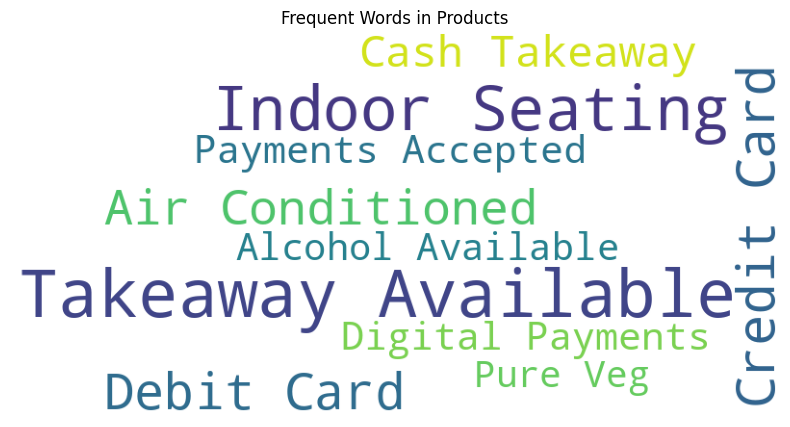

In [ ]:
from wordcloud import WordCloud
# Combine text data into a single string
text = ' '.join(unique_highlights)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words = 10).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.title('Frequent Words in Products')
plt.axis('off')
plt.show()

### **Top restaurant chains (by average rating)**


Here we will look at top chains by their ratings. I have set the criteria of number of outlets to greater than 4 to remove some outliers.

In [ ]:
atleast_5_outlets = restaurant_chains[restaurant_chains > 4]
atleast_5_outlets

,count
name,
domino's pizza,399
cafe coffee day,317
kfc,204
baskin robbins,202
keventers,189
...,...
sassy teaspoon,5
shanti sweets,5
ponnusamy hotels,5


In [ ]:
# Filter the data to include only restaurants that are part of a chain with at least 5 outlets
filtered_data = data[data['name'].isin(atleast_5_outlets.index)]
filtered_data

,res_id,name,establishment,city,cuisines,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count
0,3400299,bikanervala,quick bites,agra,"[north indian, south indian, mithai, street...",700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,very good,814,154
5,3400275,domino's pizza,quick bites,agra,"[pizza, fast food]",400,2,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,very good,707,62
7,3400368,domino's pizza,quick bites,agra,"[pizza, fast food]",400,2,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,good,617,18
8,3401284,cake house,bakery,agra,"[bakery, fast food]",500,2,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,average,322,14
11,3400425,bikanervala,casual dining,agra,"[north indian, south indian, mithai, street...",700,2,"['Dinner', 'Delivery', 'Breakfast', 'Lunch', '...",4.4,very good,523,162
...,...,...,...,...,...,...,...,...,...,...,...,...
210541,3200436,world of waffles,kiosk,vadodara,[desserts],250,1,"['Takeaway Available', 'Cash', 'Credit Card', ...",4.1,very good,95,75
210963,3200838,tea post,quick bites,vadodara,"[cafe, fast food]",400,2,"['Delivery', 'Breakfast', 'Lunch', 'Cash', 'Ta...",3.5,good,65,33
211049,3200414,chatkazz,quick bites,vadodara,"[fast food, north indian]",300,1,"['Lunch', 'Delivery', 'Dinner', 'Cash', 'Takea...",3.7,good,158,10
211882,19142822,shree janta ice cream,dessert parlour,vadodara,[ice cream],200,1,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,average,4,1


In [ ]:
# Group by restaurant name and calculate the mean of aggregate_rating
average_rating_by_chain = round(filtered_data.groupby('name')['aggregate_rating'].mean().sort_values(ascending=False).head(10).sort_values(ascending = True), 2)

# Display the result
print(average_rating_by_chain)

name
mocha                           4.48
pa pa ya                        4.50
agent jack's                    4.52
the fisherman's wharf           4.54
momo i am                       4.56
chili's american grill & bar    4.62
pirates of grill                4.65
milkshake and co.               4.68
chili's grill & bar             4.74
ab's - absolute barbecues       4.78
Name: aggregate_rating, dtype: float64


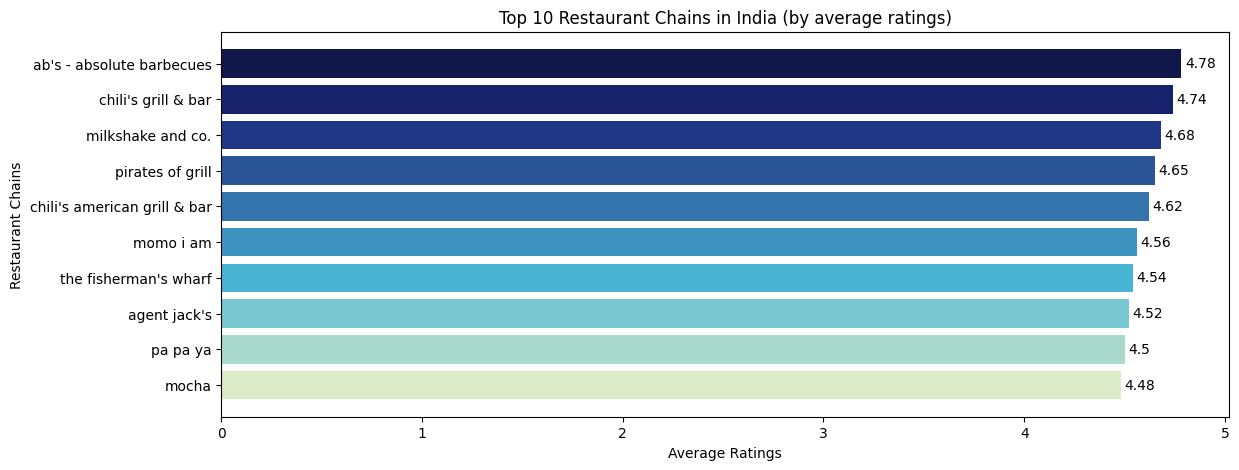

In [ ]:
# Plot
plt.figure(figsize=(13,5))
bars = average_rating_by_chain.index
height = average_rating_by_chain.values

colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(bars, height, color=colors)

# Add labels
for i, v in enumerate(height):
    plt.text(v+0.02, i, str(v), va='center', color='black')

plt.xlabel("Average Ratings")
plt.ylabel("Restaurant Chains")
plt.title("Top 10 Restaurant Chains in India (by average ratings)")
plt.show()

Interestingly, no fast food chain appears in this chart. To maintain a high rating, restaurants needs to provide superior service which becomes impossible with booming fast food restaurant in every street.

# **Bivariate Analysis**

### **votes vs photo_count**

In [ ]:
data['votes'].corr(data['photo_count'], method = 'spearman')

np.float64(0.8409912812650856)

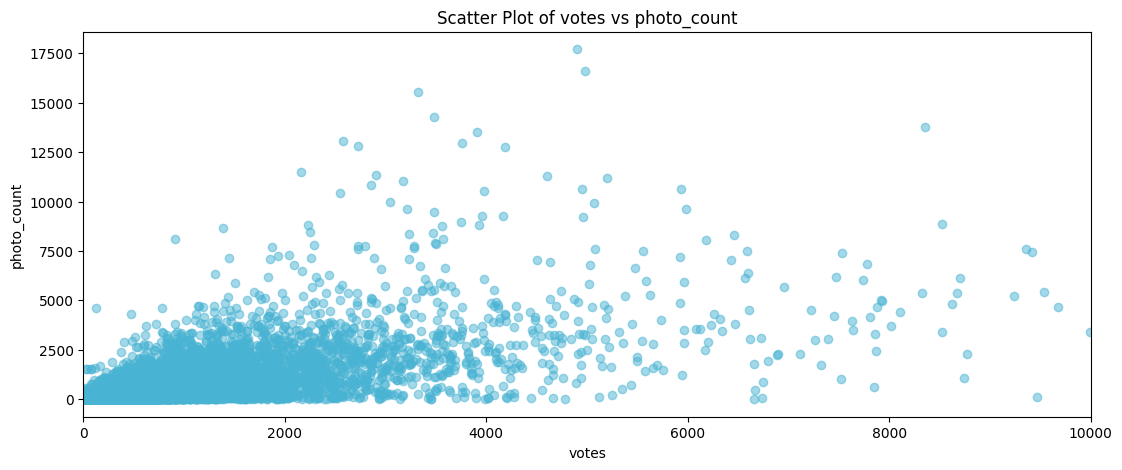

In [ ]:
plt.figure(figsize = (13, 5))
plt.scatter(data['votes'], data['photo_count'], color = '#48b3d3', alpha = 0.5)
plt.xlabel('votes')
plt.xlim([0,10000])
plt.ylabel('photo_count')
plt.title('Scatter Plot of votes vs photo_count')
plt.show()

There is direct correlation between votes and photos. higher votes means more photos uploaded. This will help us in other analysis as we can consider votes or photo_count as popularity.

### **Relation between average_price_for_two and aggregate_rating**

In [ ]:
# calculating pearson correlation
pearson_corr = round(data['average_cost_for_two'].corr(data['aggregate_rating']), 2)
pearson_corr

np.float64(0.25)

In [ ]:
# Calculating spearman_corr
spearman_corr = round(data['average_cost_for_two'].corr(data['aggregate_rating'], method = 'spearman'), 2)
spearman_corr

np.float64(0.4)

As data is not continuous/normal, we will go with Spearman correlation. spearman correlation is +0.4 we can say correlation can be seen between restaurant average cost and rating.

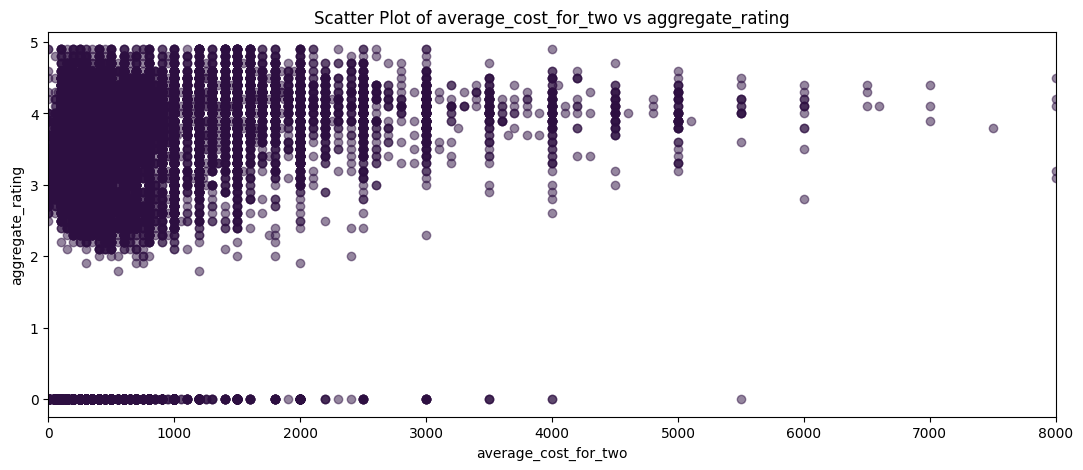

In [ ]:
plt.figure(figsize = (13, 5))
plt.scatter(data['average_cost_for_two'], data['aggregate_rating'], color = '#2d0f41', alpha = 0.5)
plt.xlabel('average_cost_for_two')
plt.ylabel('aggregate_rating')
plt.xlim([0,8000])
plt.title('Scatter Plot of average_cost_for_two vs aggregate_rating')
plt.show()

There is definetely a direct positive relation between the two. This means higher cost mean higher rating.

### **Relation between votes and aggregate_rating**

Do better ratings means higher popularity?

In [ ]:
# calculating pearson correlation
pearson_corr = round(data['votes'].corr(data['aggregate_rating']), 2)
pearson_corr

np.float64(0.28)

In [ ]:
# Calculating spearman_corr
spearman_corr = round(data['votes'].corr(data['aggregate_rating']), 2)
spearman_corr

np.float64(0.28)

As spearman and pearson coorelation same we can say that their is linear relationship. correlation is +0.28 we can say correlation can be seen between votes and rating.

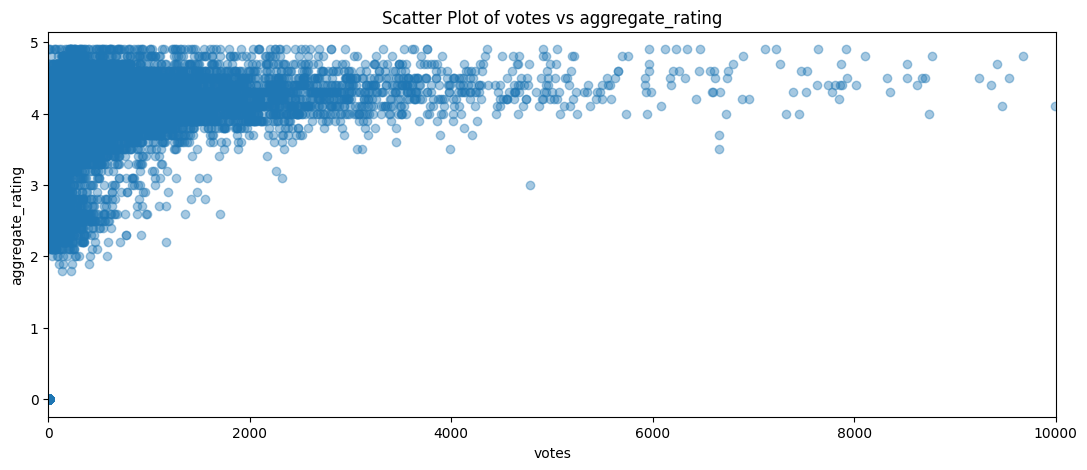

In [ ]:
plt.figure(figsize = (13, 5))
plt.scatter(data['votes'], data['aggregate_rating'], alpha=0.4)
plt.xlabel('votes')
plt.ylabel('aggregate_rating')
plt.xlim([0,10000])
plt.title('Scatter Plot of votes vs aggregate_rating')
plt.show()

There is definetely a direct relation between the two. This relation concludes that if the restaurant is rated highly, it is more popular(higher votes).

# **Multivariate Analysis**

### **Which features are most strongly correlated?**

                      average_cost_for_two  price_range  aggregate_rating  \
average_cost_for_two                  1.00         0.88              0.40   
price_range                           0.88         1.00              0.31   
aggregate_rating                      0.40         0.31              1.00   
votes                                 0.48         0.36              0.86   
photo_count                           0.56         0.44              0.75   

                      votes  photo_count  
average_cost_for_two   0.48         0.56  
price_range            0.36         0.44  
aggregate_rating       0.86         0.75  
votes                  1.00         0.84  
photo_count            0.84         1.00  


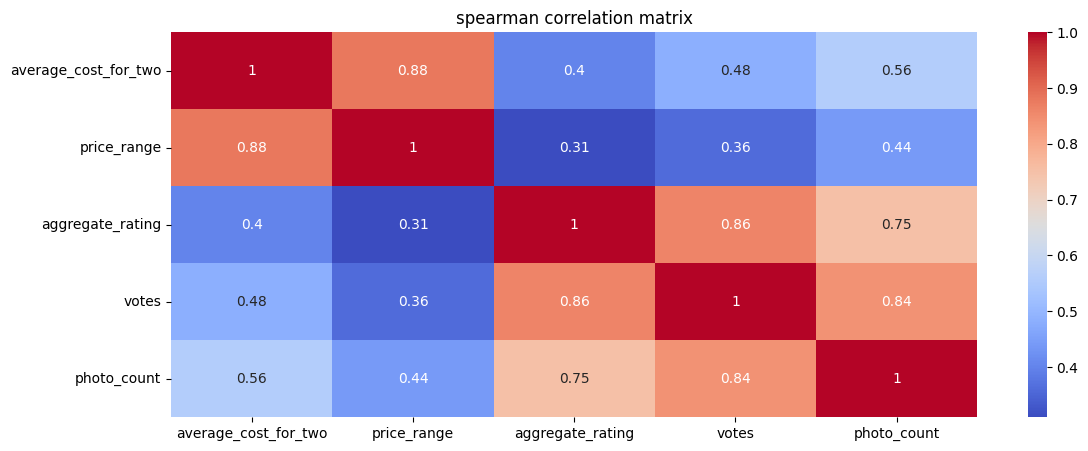

In [ ]:
# Calculating spearman Correlation Coefficients (for non linear relationships)
spearman_correlation_matrix = round(data.corr(numeric_only=True, method = 'spearman'),2)
print(spearman_correlation_matrix)

# Create a Heatmap to visualize the correlations
plt.figure(figsize=(13, 5))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("spearman correlation matrix")
plt.show()


we have already analyzed all the correlations above. there is strong correlation between votes and aggregate_rating, photo_count and aggregate_rating.

### **Average aggregate_rating, votes and photos (by establishment)**

Here, we will not plot each graph since it will make this notebook filled with horizontal bar charts. I see horizontal bar charts the only option to display results of this kind when we have lots of classes to compare (here 10 classes). Let's look at value_counts( ) directly

In [ ]:
# top 10 average aggregate_rating by establishment
data.groupby('establishment')[['aggregate_rating', 'votes', 'photo_count']].mean().sort_values(by = 'aggregate_rating', ascending=False).head(10)

,aggregate_rating,votes,photo_count
establishment,,,
microbrewery,4.268182,1992.300000,2042.054545
pub,3.758263,880.274510,652.955182
cocktail bar,3.531250,309.625000,555.625000
fine dining,3.436547,293.126384,364.817590
lounge,3.436463,494.509756,514.687805
club,3.378571,300.544643,107.089286
irani cafe,3.321429,178.714286,173.000000
casual dining,3.238680,396.339935,291.550448
café,3.212345,276.558574,331.935969


It can be concluded that establishments with alcohol availability have highest average ratings, votes and photo uploads.

### **Average aggregate_rating, votes and photos (by city)**

In [ ]:
data.groupby('city')[['aggregate_rating', 'votes', 'photo_count']].mean().sort_values(by = 'aggregate_rating', ascending=False).head(10)

,aggregate_rating,votes,photo_count
city,,,
gurgaon,3.828525,613.180328,678.491803
secunderabad,3.822222,955.433333,218.877778
hyderabad,3.755839,955.549878,377.274939
kolkata,3.751947,615.706833,667.558413
new delhi,3.727347,711.116197,764.258216
mumbai,3.709298,797.158259,882.273492
bangalore,3.698175,724.940365,462.287939
noida,3.620307,515.570881,492.291188
chennai,3.597701,340.738916,246.313082


Gurgaon has highest rated restaurants whereas Hyderabad has more number of votes. Mumbai and New Delhi dominates for most photo uploads per outlet.

### **Most Expensive Restauants**

In [ ]:
data.groupby(['name','establishment','city'])['average_cost_for_two'].max().sort_values(ascending=False).head(10).reset_index()

,name,establishment,city,average_cost_for_two
0,ocean - the private dining room - sahara star,fine dining,mumbai,30000
1,bhairo,fine dining,udaipur,15000
2,gol bungalow - taj falaknuma palace,fine dining,hyderabad,15000
3,fly dining,fine dining,bangalore,14000
4,risala- umaid bhawan palace,fine dining,jodhpur,12000
5,trophy bar- umaid bhawan palace,bar,jodhpur,12000
6,pillars - umaid bhawan palace,fine dining,jodhpur,12000
7,wasabi by morimoto - the taj mahal palace,fine dining,mumbai,10000
8,adaa - taj falaknuma palace,fine dining,hyderabad,8000
9,orient express - taj palace,fine dining,new delhi,8000


As we can see that the most expensive restaurant is ocean-The Private Dining Room sahara located in Mumbai.
4 restaurants out of 10 is located in Rajasthan one in Udaipur and three in Jodhpur

# **Hypothesis Testing**

### **Independent t-test (Dining vs Quick Bites ratings)**
Use when comparing the mean of two groups (numerical variable vs categorical with 2 groups).

**Do Dining restaurants have higher average ratings than Quick Bites?**

**Set Up Hypotheses**

Dining vs Quick Bites ratings

H₀: μ₁ = μ₂ (Average ratings are the same)

H₁: μ₁ ≠ μ₂ (Average ratings are different)

let significance level(α) be 0.05

In [ ]:
# subset_data
fine_dining = data[data['establishment'] == 'fine dining']['aggregate_rating']
quick_bites = data[data['establishment'] == 'quick bites']['aggregate_rating']

In [ ]:
t_stat, p_val = stats.ttest_ind(fine_dining, quick_bites, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: 11.410594993241139
p-value: 3.301728734858586e-29


In [ ]:
if p_val < 0.05:
    print("Reject Null Hypothesis → Ratings differ between Dining and Quick Bites.")
else:
    print("Fail to Reject Null Hypothesis → No significant difference in ratings.")

Reject Null Hypothesis → Ratings differ between Dining and Quick Bites.


In [ ]:
round(data[data['establishment'].isin(['fine dining', 'quick bites'])].groupby('establishment')['aggregate_rating'].mean().sort_values(ascending=False), 2)

,aggregate_rating
establishment,
fine dining,3.44
quick bites,3.02


In [ ]:
fine_dining_avg_ratings = data.groupby('establishment')['aggregate_rating'].mean()['fine dining']
quick_bites_avg_ratings = data.groupby('establishment')['aggregate_rating'].mean()['quick bites']

In [ ]:
if fine_dining_avg_ratings > quick_bites_avg_ratings:
  print("Fine Dining has higher average rating and it is: ", round(fine_dining_avg_ratings,  2) )
else:
  print("Quick Bites has higher average rating and it is: ", round(quick_bites_avg_ratings, 2) )

Fine Dining has higher average rating and it is:  3.44


### **Z-test (Delhi vs Mumbai average cost)**
Use when you have large samples (n > 30) and want to compare means (similar to t-test, but assumes population standard deviation is known or approximated).

**Compare average cost of two cities (Delhi vs Mumbai)**

**Set Up Hypotheses**

Delhi vs Mumbai average cost

H₀: μ₁ = μ₂ (Average costs are the same)

H₁: μ₁ ≠ μ₂ (Average costs are different)

let significance level(α) be 0.05

In [ ]:
# subset_data
delhi = data[data['city'] == 'new delhi']['average_cost_for_two']
mumbai = data[data['city'] == 'mumbai']['average_cost_for_two']

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
z_stat, p_val = ztest(delhi, mumbai)
print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: 11.410594993241139
p-value: 0.03526071331983978


In [ ]:
if p_val < 0.05:
    print("Reject Null Hypothesis → Average cost differ between New Delhi and Mumbai.")
else:
    print("Fail to Reject Null Hypothesis → No significant difference in Average cost.")

Reject Null Hypothesis → Average cost differ between New Delhi and Mumbai.


In [ ]:
newdelhi_average_cost = data.groupby('city')['average_cost_for_two'].mean()['new delhi']
mumbai_average_cost = data.groupby('city')['average_cost_for_two'].mean()['mumbai']

In [ ]:
if newdelhi_average_cost > mumbai_average_cost:
  print("New Delhi has higher cost for two and it is: ", newdelhi_average_cost )
else:
  print("Mumbai has higher cost for two and it is: ", mumbai_average_cost )

Mumbai has higher cost for two and it is:  1075.0989119683481


### **Chi-Square Test of Independence(price_range vs rating_text)**

Chi-square only tells you if there is an association, not which is higher. But you can inspect the contingency table proportions.

**Does higher price range imply higher rating??**

**Set Up Hypotheses**

price_range vs rating_text

H₀: μ₁ = μ₂ (No relationship between price range and rating_text.)

H₁: μ₁ ≠ μ₂ (Price range and rating_text are dependent.)

let significance level(α) be 0.05

In [ ]:
# Create contingency table
cont_table = pd.crosstab(data['price_range'], data['rating_text'])
cont_table

rating_text,average,excellent,good,not rated,poor,very good
price_range,,,,,,
1,9681,357,7695,7412,204,3469
2,4701,413,5535,1835,292,3806
3,1543,611,2003,623,74,2516
4,401,237,801,192,13,1154


In [ ]:
# Perform chi-square test
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)
print("Chi2 Statistic:", chi2)
print("P-value:", p_val)

Chi2 Statistic: 6521.89161576332
P-value: 0.0


In [ ]:
if p_val < 0.05:
    print("Reject Null Hypothesis → Price range and rating_text are dependent.")
else:
    print("Fail to Reject Null Hypothesis → No relationship between price range and rating_text.")

Reject Null Hypothesis → Price range and rating_text are dependent.


# **Key Insights & Recommendations**

**1. Restaurant Chains & Outlets**
* Some chains (e.g., Domino’s pizza, kfc, Café Coffee Day, baskin robbins) dominate with multiple outlets across cities.
* Approx. 35% of restaurants in India are part of some chain.
* Insight: Chains have strong market presence but might face competition in metros.
* Recommendation: New entrants should analyze outlet density before expansion.

**2. Establishment Type**
* Most restaurants are Quick Bites and Casual Dining, while Fine Dining is relatively rare.
* Establishments with alcohol availability have highest average ratings, votes and photo uploads.
* Insight: Customers in India prefer affordable dining options.
* Recommendation: Investors should focus more on quick-service restaurants (QSRs).

**3. Cost Analysis**
* Z-test showed average cost for two differs significantly across cities.
* Metro cities also have different costs(Mumbai is more expensive as compared to Delhi).
* Majority of restaurants are budget friendly with average cost of two between Rs.250 to Rs.800
* Recommendation: Pricing strategy should be city-specific.

**4. Cuisine Preferences**
* Surprisingly, Chinese food comes second in the list of cuisines that Indians prefer, even more than fast food, desserts and South Indian food.
* Recommendation: Restaurants should include at least 2–3 popular cuisines in menus.

**5. Ratings & Reviews**
* Spearman and Pearson test showed a positive correlation between votes and ratings.
* Insight: Higher ratings helps in restaurants becoming trendy .
* Recommendation: Focus on customer engagement → encourage reviews & ratings.

**6. Photos & Votes**
* Restaurants with more photos have higher popularity.
* Recommendation: Improve online presence with quality food & ambiance images.

**8. City-Level Insights**
* Delhi NCR, Bangalore, Mumbai dominate in outlet count.
* Gurgaon has highest rated restaurants (average 3.83) whereas Hyderabad has more number of critics (votes). Mumbai and New Delhi dominates for most photo uploads per outlet
* Smaller cities have fewer but highly rated restaurants.
* Recommendation: Potential growth opportunities in Tier-2 cities.

**Final Business Recommendations**
* **Expansion Strategy:** Focus on Tier-2 cities with fewer outlets but high ratings.
* **Pricing Strategy:** Adjust prices based on city cost-levels.
* **Marketing:** Encourage customers to leave votes/reviews.
* **Digital Strategy:** Upload high-quality food & ambiance photos to improve ratings.
* **Menu Strategy:** Include multi-cuisine options to attract broader customers.

# **Conclusion**

* The EDA revealed strong patterns in restaurant chains, establishment types, costs, cuisines, and ratings.
* City-level differences and establishment-level rating variations are statistically significant.
* Customers in India strongly prefer Quick Bites and Casual Dining, while multi-cuisine restaurants get better ratings.
* Engagement factors like photos and votes improve restaurant visibility and ratings.
* Overall, the dataset provides valuable insights into customer dining behavior and restaurant market dynamics in India.